# Purpose
---
The purpose of this note book is to explore NLP classification modeling techniques on the Fake and Real News dataset obtained from kaggle : https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

Furthermore, the project while be outlined using the 6 steps of data analysis adapted to machine learning 


# 6 Key steps 

We will follow and adapt the 6 key steps of Data analysis to this project.

6 Key steps: 

1) Ask 
- Define what the project would look like 
- Define what would qualify as successful result

2) Prepare 
- Build a timeline and determine how much time is needed
- Determine what data is needed to achieve a successful result

3) Process
- Collect, store, manage and protect the data.
- Processed the data by cleaning it to make sure it was complete, correct, relevant, and free of errors and outliers.

4) Analyze
- Experiment with different models and hyperparameters to meet criterias of success 
- Analyze data

5) Share / Visualize 
- Process and visualize data to share / make meaningful deductions from 

6) Act
- Determine how to implement changes and take actions based on the findings

# 1) Ask 
---

## Define what the project would look like 

## Define what would qualify as a successful result


# 2) Prepare 
---
## Build a timeline and determine how much time is needed

## Determine what data is needed to achieve a successful result


In [52]:
# Import required libraries
import pandas as pd
import numpy as np
from collections import Counter

# NLP Imports
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams, bigrams, trigrams
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer

import re,string,unicodedata
from string import punctuation

# Import plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# machine learning imports
import tensorflow as tf
from tensorflow.keras import layers
import sklearn as sk

# Split into training and test sets 
from sklearn.model_selection import train_test_split

# 3) Process
---
##Collect, store, manage and protect the data.

##Processed the data by cleaning it to make sure it was complete, correct, relevant, and free of errors and outliers.

## Import data
 
 The dataset that we will be using is the dataset from kaggle: 
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

The data is pre-split into fake and real dataset so we will need to import them seperately 

In [2]:
# Import dataset
fake = pd.read_csv("https://raw.githubusercontent.com/Kirlewn/Machine-Learning-Projects/main/Data/fake_real_news/Fake.csv")
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [4]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


Import real dataset

In [5]:
# Import dataset
real = pd.read_csv("https://raw.githubusercontent.com/Kirlewn/Machine-Learning-Projects/main/Data/fake_real_news/True.csv")
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
real.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [7]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


From the data we can see that the data is unlabeled, so we can create two datasets. We will keep one dataset unlabeled to explore unsupervised models. Then we will make a second dataset with labels and compare their performance. 

## Check for missing data

In [8]:
fake.isna().sum() # Checking for nan Values

title      0
text       0
subject    0
date       0
dtype: int64

In [9]:
real.isna().sum() # Checking for nan Values

title      0
text       0
subject    0
date       0
dtype: int64

## Dataset Merging

In [10]:
unlabeled_data = pd.concat([fake, real], axis = 0)
unlabeled_data

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [11]:
fake['label'] = 1
real['label'] = 0

In [12]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [13]:
real.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [14]:
labeled_data = pd.concat([fake, real], axis = 0)
labeled_data

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


## Data Exploration & Visualization

In [15]:
labeled_data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

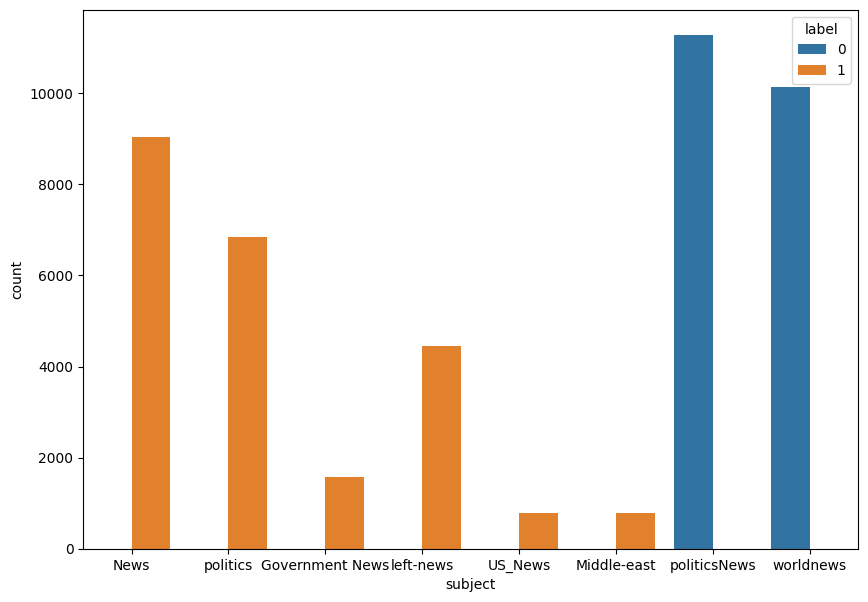

In [16]:
plt.figure(figsize = (10, 7))
sns.countplot(x = "subject", hue = "label", data = labeled_data);

It would appear that the subjects while similar are named differently between the fake and real dataset. 

i.e politics in fake data vs. politicNews in real data

This might cause some problems later. We can either drop this column or we could try to normalize the columns. For example, we could rename poltics news to politics, but the problem is there is too many vairations of news in the fake dataset to get a good equivalent of world news. 

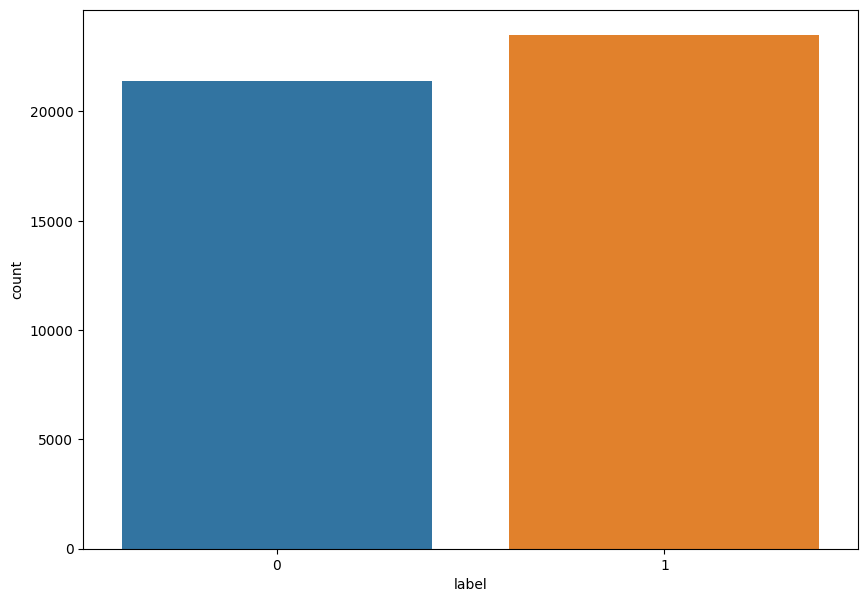

In [17]:
plt.figure(figsize = (10, 7))
sns.countplot(x = labeled_data.label, data = labeled_data);

We have a fairly even distribution of labels

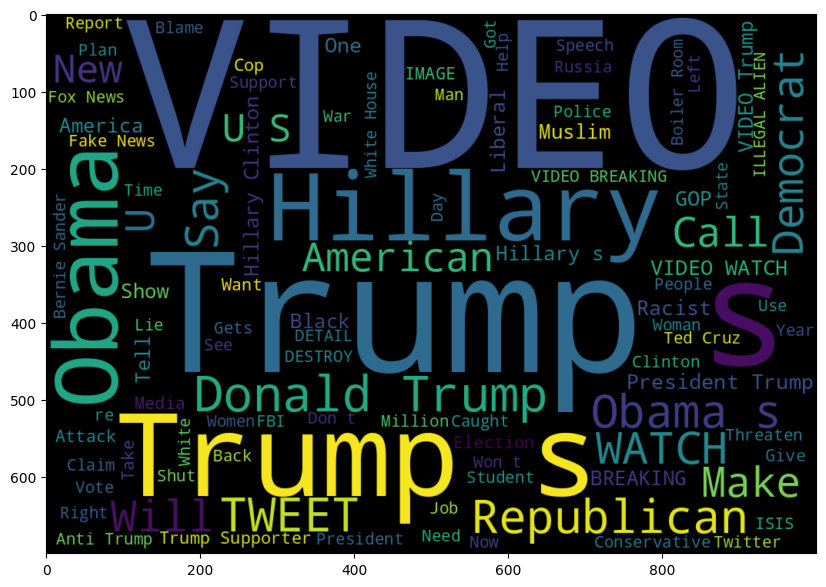

In [18]:
# visualize most popular words in title for fake data
plt.figure(figsize = (10, 7))
wc = WordCloud(max_words = 100, width = 1000, height = 700, stopwords = STOPWORDS).generate(" ".join(labeled_data[labeled_data.label == 1].title))
plt.imshow(wc , interpolation = 'bilinear');

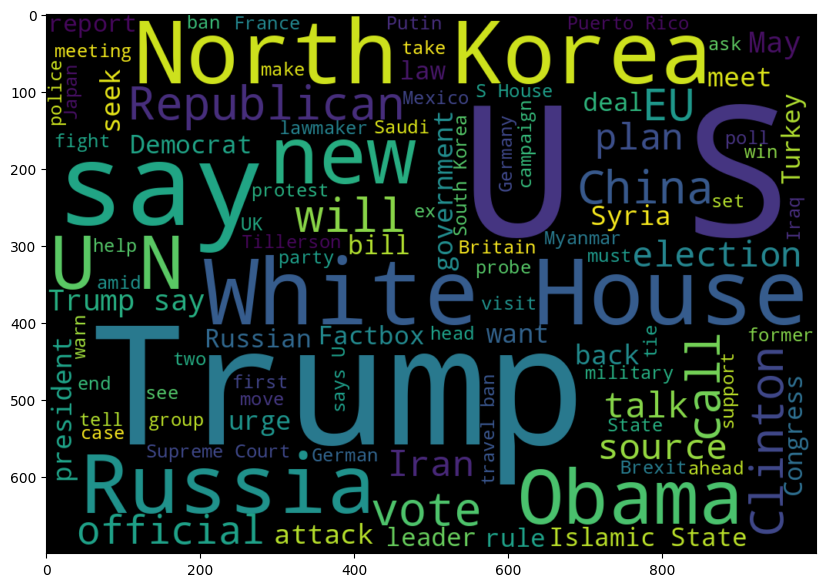

In [19]:
# visualize most popular words in title for real data
plt.figure(figsize = (10, 7))
wc = WordCloud(max_words = 100, width = 1000, height = 700, stopwords = STOPWORDS).generate(" ".join(labeled_data[labeled_data.label == 0].title))
plt.imshow(wc , interpolation = 'bilinear');

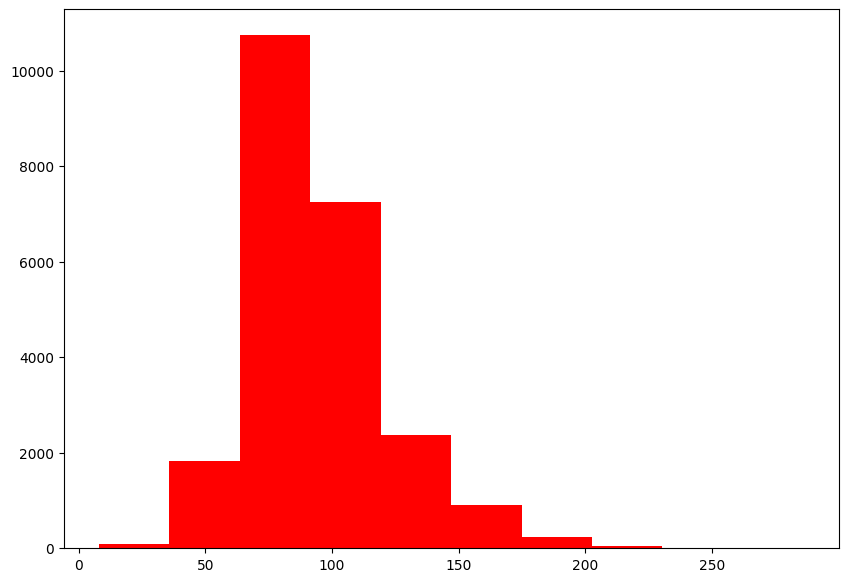

In [20]:
plt.figure(figsize =(10, 7))
title_len = labeled_data[labeled_data['label'] == 1]['title'].str.len()
plt.hist(title_len, color= 'r'); 

Fake news generally has longer titles than real news

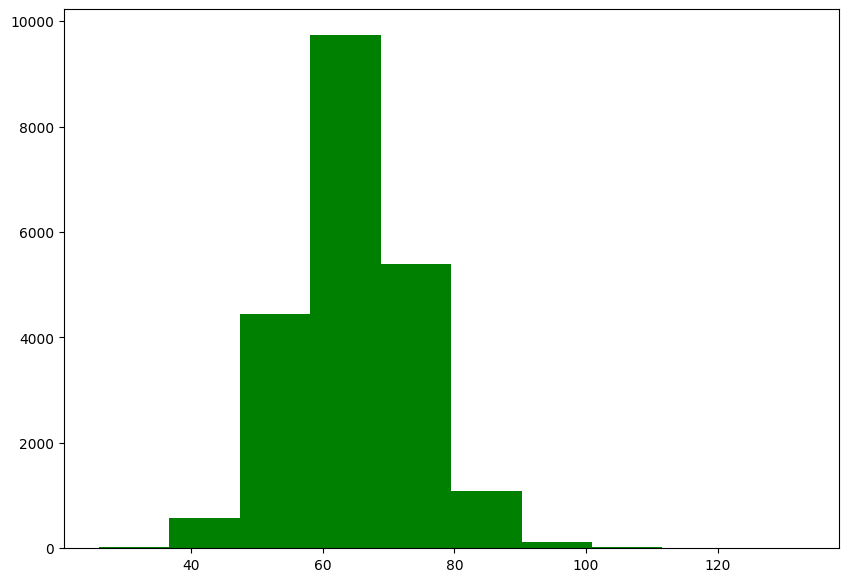

In [21]:
plt.figure(figsize =(10, 7))
title_len = labeled_data[labeled_data['label'] == 0]['title'].str.len()
plt.hist(title_len, color= 'g'); 

## Data Preprocessing

Let's rename the `text` column to `body`

In [22]:
labeled_data.rename(columns = {'text':'body'}, inplace = True)
labeled_data.head()

,title,body,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


Let's do it again for the unlabeled data

In [23]:
unlabeled_data.rename(columns = {'text':'body'}, inplace = True)
unlabeled_data.head()

,title,body,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [24]:
# Checking data type of date column
type(labeled_data.iloc[0].date)

str

In [25]:
#labeled_data['datetime'] = pd.to_datetime(labeled_data.date, format="%m/%d/%Y")
#labeled_data.head()

### Stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
stop_words = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

Let's create a function that preprocesses our text data
It will 
* make all text lowercase
* remove stop words 
* remove prefixes and suffixes

In [28]:
def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

Before we apply this function to our data, let's merge our title and text data into a single column called `text`.

In [29]:
labeled_data['text'] = labeled_data['title'] + " " + labeled_data['body']
labeled_data.text.head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: text, dtype: object

In [30]:
unlabeled_data['text'] = unlabeled_data['title'] + " " + unlabeled_data['body']
unlabeled_data.text.head()

0     Donald Trump Sends Out Embarrassing New Year’...
1     Drunk Bragging Trump Staffer Started Russian ...
2     Sheriff David Clarke Becomes An Internet Joke...
3     Trump Is So Obsessed He Even Has Obama’s Name...
4     Pope Francis Just Called Out Donald Trump Dur...
Name: text, dtype: object

Lets apply the function to our text data

In [31]:
labeled_data['preprocess'] = labeled_data['text'].apply(preprocess)
labeled_data.head()

,title,body,subject,date,label,text,preprocess
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1,Donald Trump Sends Out Embarrassing New Year’...,donald trump send embarrass new year eve messa...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1,Drunk Bragging Trump Staffer Started Russian ...,drunk brag trump staffer start russian collus ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1,Sheriff David Clarke Becomes An Internet Joke...,sheriff david clark becom internet joke threat...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1,Trump Is So Obsessed He Even Has Obama’s Name...,trump obsess even obama name code websit imag ...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1,Pope Francis Just Called Out Donald Trump Dur...,pope franci call donald trump christma speech ...


Let's do it again for unlabeled data (shortcut: as this can take a while, we can just use the labeled_data and drop the label column)

In [32]:
#unlabeled_data['preprocess'] = unlabeled_data['text'].apply(preprocess)
#unlabeled_data.head()

Let's look at the most common words without stop words

In [33]:
#Get Most Common Words
Counter(" ".join(labeled_data["preprocess"]).split()).most_common(10)

[('trump', 149818),
 ('said', 133033),
 ('state', 64817),
 ('presid', 62458),
 ('u', 59811),
 ('would', 55666),
 ('peopl', 42656),
 ('year', 42412),
 ('republican', 41618),
 ('say', 41060)]

In [34]:
#showing word pairs and their occurances
#looping through all incidents and joining them to one text, to extract most common words
all_words = ''
for arg in labeled_data["preprocess"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

n_gram = 2
n_gram_dic = dict(Counter(ngrams(all_words.split(), n_gram)))

n_gram
for i in n_gram_dic:
    if n_gram_dic[i] >=10000 :
        print(i, n_gram_dic[i])

('donald', 'trump') 25222
('hillari', 'clinton') 10230
('unit', 'state') 18974
('white', 'hous') 16305


# 4) Analyze

### Model 0: Getting a baseline (TF-IDF Multinomial Naive Bayes Classifier)

In [35]:
# split data into x and y 
x = labeled_data['text']
y = labeled_data['label']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30)

In [37]:
x_train.head()

14197    FORD CEO Tells Trump They’ll Move Forward With...
21407    WE WILL NOT COMPLY! VA Residents Refuse To Obe...
15122    DEMOCRAT’S WORST NIGHTMARE: [Video] Sassy Trum...
4729      CNN FINALLY Does Its Job, Hammers Trump With ...
3472      Donald Trump Is An Illegitimate President-Ele...
Name: text, dtype: object

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline 
model_0 = Pipeline([
    ("tf-idf", TfidfVectorizer()),
    ('clf' , MultinomialNB())
])

# Fit the pipeline to the training data
model_0.fit(X= x_train,
            y = y_train)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [39]:
# Evaluate baseline model on validation dataset
model_0.score(X = x_test,
              y = y_test)

0.9361544172234595

### Model 1: Conv1D with token embeddings


#### Text vectorization

In [40]:
# How long is each sentence on average
sent_lens = [len(sentence.split()) for sentence in x_train]
avg_sent_len =  np.mean(sent_lens)
avg_sent_len

417.44718085783376

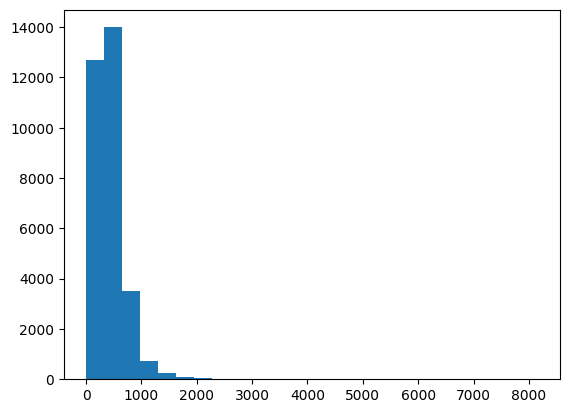

In [41]:
# What's the distribtuion look like 
plt.hist(sent_lens, bins = 25);

In [42]:
# How long of a sentence length covers 95% of examples
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

915

In [43]:
# How many words are in our vocab
max_tokens = 68000

In [44]:
# Create text vectorizer 
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens = max_tokens, # number of words in vocabulary
                                    output_sequence_length = output_seq_len)

In [45]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(x_train)

In [50]:
# Test out text vectorizer on random sentences
import random 
target_sentence = random.choice(x_train)
print(f"Text:\n {target_sentence}")
print(f"\nLength of text:{len(target_sentence)}")
print(f"\nVectorized Text: {text_vectorizer([target_sentence])}")

Text:
 Senators criticize Trump's information shut-out to Democrats WASHINGTON (Reuters) - U.S. senators from both parties this week have criticized the Trump administration’s decision that government agencies do not have to provide information to Democratic lawmakers, saying the step will prevent Congress from carrying out its constitutional duties.  During budget and nomination hearings, senators have pressed current and prospective officials about a Justice Department legal opinion dated May 1. The opinion said information requests to executive agencies from senior Democrats on congressional committees, called ranking members, “do not trigger any obligation to accommodate congressional needs and are not legally enforceable through a subpoena or contempt proceedings.” The opinion, largely unprecedented, says agencies are required to give information to only committee chairs, positions held by members of the majority party in Congress. Currently, Republicans control both chambers of C

In [48]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'dtype': 'string',
 'batch_input_shape': (None, None),
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 915,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None,
 'encoding': 'utf-8',
 'vocabulary_size': 68000}

In [49]:
# How many words in our training vocabulary 
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(rct_20k_text_vocab)}")
print(f"Most common words in vocab: {rct_20k_text_vocab[:5]}")
print(f"Least common words in vocab: {rct_20k_text_vocab[-5:]}")


Number of words in vocab: 68000
Most common words in vocab: ['', '[UNK]', 'the', 'to', 'of']
Least common words in vocab: ['668', '665', '6630', '663', '661']


In [53]:
# Create token embedding layer 
token_embed = layers.Embedding(input_dim = len(rct_20k_text_vocab),
                               output_dim = 128,# Different embedding sizes result in drastically different number of parameters
                               mask_zero = True,# use masking to handle variable sequence lengths (save space)
                               name = 'token_embedding')

In [54]:
# Show example embedding
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding): \n {vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding: \n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 Senators criticize Trump's information shut-out to Democrats WASHINGTON (Reuters) - U.S. senators from both parties this week have criticized the Trump administration’s decision that government agencies do not have to provide information to Democratic lawmakers, saying the step will prevent Congress from carrying out its constitutional duties.  During budget and nomination hearings, senators have pressed current and prospective officials about a Justice Department legal opinion dated May 1. The opinion said information requests to executive agencies from senior Democrats on congressional committees, called ranking members, “do not trigger any obligation to accommodate congressional needs and are not legally enforceable through a subpoena or contempt proceedings.” The opinion, largely unprecedented, says agencies are required to give information to only committee chairs, positions held by members of the majority party in Congress. Currently, Republicans c

In [55]:
# Turn our data into tensorflow datasets
train_dataset =tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_dataset =tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [56]:
train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [57]:
# Take tensorflow datasets and  turn them into prefetch
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Create the 1D conv model to process sequences 
inputs = layers.Input(shape = (1,), dtype= tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size = 5, padding = 'same', activation = 'relu')(token_embeddings) 
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector from conv layer
outputs = layers.Dense(2, activation = 'softmax')(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile 
model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit
history_1 = model_1.fit(train_dataset,
                        steps_per_epoch = int(0.1*len(train_dataset)),
                        epochs = 3)